In [97]:
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

df = px.data.iris()
df.drop("species", axis=1, inplace=True)

In [98]:
X = df.drop("species_id", axis=1)
y = df["species_id"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
lr = LogisticRegression()
params = {"C": [.3, .5, .75, .8, .9]}


gs = GridSearchCV(estimator=lr, param_grid=params)
gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.3, 0.5, 0.75, 0.8, 0.9]})

In [100]:
gs.best_estimator_

LogisticRegression(C=0.75)

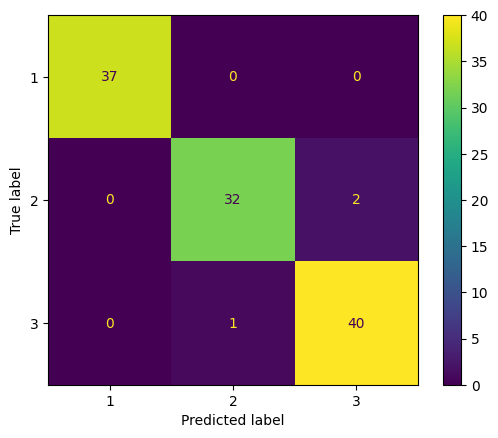

In [101]:
ConfusionMatrixDisplay.from_estimator(gs.best_estimator_, X_train, y_train)  

plt.show()

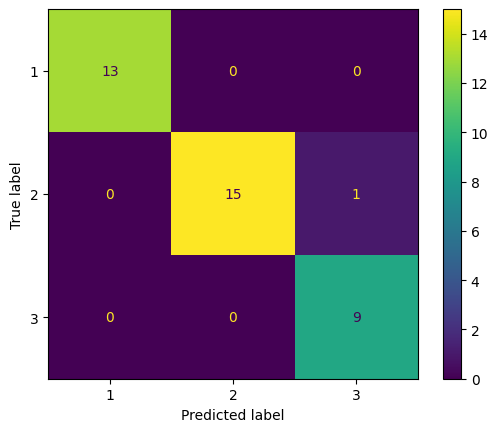

In [102]:
ConfusionMatrixDisplay.from_estimator(gs.best_estimator_, X_test, y_test)

plt.show()

In [103]:
coefs = pd.DataFrame(gs.best_estimator_.coef_, columns=df.drop("species_id", axis=1).columns).apply(np.abs)

In [104]:
for i in range(coefs.shape[0]):
    fig = px.bar(coefs.loc[i])
    fig.show()